# Rohan Khaitan MDS201812

# Fashion mnist Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import os


In [2]:
os.chdir("/home/rohan/CMI/SEM 2/AML/Fashion mnist/fashionmnist")

In [3]:
train_data=pd.read_csv('fashion-mnist_train.csv', encoding = 'Latin-1')

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data=pd.read_csv('fashion-mnist_test.csv', encoding = 'Latin-1')

In [6]:
train_data.shape

(60000, 785)

In [7]:
test_data.shape

(10000, 785)

In [8]:
train_data['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [9]:
train_pixel=train_data.drop(['label'],axis=1)
test_pixel=test_data.drop(['label'],axis=1)

# k-mean Clustering

K-means clustering is a type of unsupervised learning, which is used when we have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data,with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

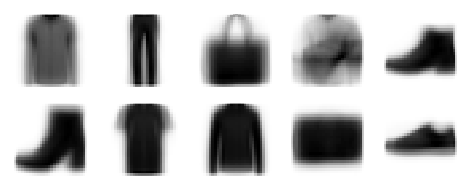

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
model= kmeans.fit(train_pixel)
clusters = model.predict(test_pixel)
model.cluster_centers_.shape

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test_data["label"][mask])[0]

In [15]:
x=pd.DataFrame(labels)
x[0].unique()

array([0, 1, 5, 6, 8, 4, 7, 9])

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data["label"], labels)

0.552

In [18]:
#Silhouette refers to a method of interpretation and validation of consistency within clusters of data. 
#The technique provides a succinct graphical representation of how well each object one cluster.

#The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other
#clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is 
#well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value,
#then the clustering configuration is appropriate. If many points have a low or negative value, then the 
#custering configuration may have too many or too few clusters.

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(test_data,labels )

0.14641299222141224

# PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a
set of observations of possibly correlated variables (entities each of which takes on various numerical values)
into a set of values of linearly uncorrelated variables called principal components.
It uses the Singular Value Decomposition(SVD) technique.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_pixel_scaled = scaler.fit_transform(train_pixel)
test_pixel_scaled = scaler.fit_transform(test_pixel)
from sklearn.decomposition import PCA


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components_train= pca.fit_transform(train_pixel_scaled)
principal_components_test= pca.fit_transform(test_pixel_scaled)
                    
train_pixel_proj = pd.DataFrame(data = principal_components_train, 
                           columns = ['pc_1', 'pc_2'])
test_pixel_proj = pd.DataFrame(data = principal_components_test, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=10, random_state=0)

model= kmeans.fit(train_pixel_proj)
clusters = model.predict(test_pixel_proj)
model.cluster_centers_.shape


labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test_data["label"][mask])[0]

# Compute the accuracy
accuracy_score(test_data["label"], labels)

0.4361

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(test_data,labels )

0.08086357857519376

# t-SNE

Another dimensionality reduction Tehnique is TSNE.
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a (prize-winning) technique for dimensionality reduction 
that is particularly well suited for the visualization of high-dimensional datasets.

In [25]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
train_pixel_proj = tsne.fit_transform(train_pixel)
test_pixel_proj = tsne.fit_transform(test_pixel)

kmeans = KMeans(n_clusters=10, random_state=0)
model = kmeans.fit(train_pixel_proj)
clusters = model.predict(test_pixel_proj)
model.cluster_centers_.shape

labels_proj = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels_proj[mask] = mode(test_data["label"][mask])[0]
    
# Compute the accuracy
accuracy_score(test_data["label"], labels_proj)    

0.5924

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(test_data,labels_proj )

0.08592583891824689

# Visualization

In [32]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


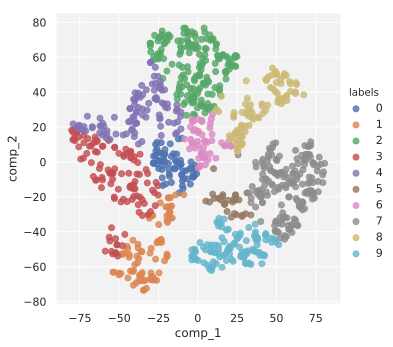

In [34]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(test_pixel_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels_proj
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(1000) ,fit_reg=False)
print("ready")
